In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv?


In [ ]:
data = pandas.read_csv

In [3]:
data = pandas.read_csv

In [4]:
data = pandas.read_csv

In [5]:
data = pandas.read_csv('uber-raw-data-apr14.txt')

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
dt = '4/1/2014 0:11:00'

In [8]:
d,t = dt.split(' ')
print('Date: '+ d)
print('Time: ' + t)

Date: 4/1/2014
Time: 0:11:00


In [9]:
m, d, y = d.split('/') 

In [10]:
int(d)

1

In [11]:
dt = pandas.to_datetime(dt)

In [12]:
dt

Timestamp('2014-04-01 00:11:00')

In [13]:
dt.week

14

In [14]:
dt.weekday_name

'Tuesday'

In [28]:
dt.day

1

In [29]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [17]:
data.tail(3)

,Date/Time,Lat,Lon,Base
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [18]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [19]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [20]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

## analyze the DoM

(array([ 52721.,  59680.,  52581.,  58631.,  45427.,  56764.,  38781.,
         60673.,  64697.,  74561.]),
 array([  1. ,   3.9,   6.8,   9.7,  12.6,  15.5,  18.4,  21.3,  24.2,
         27.1,  30. ]),
 <a list of 10 Patch objects>)

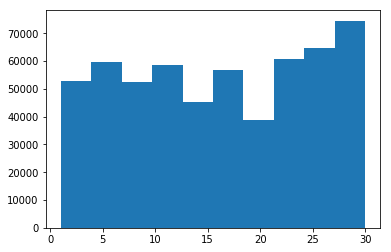

In [21]:
hist(data.dom)

Text(0.5,1,'Frequency by DoM - Uber -Apr 2014 ')

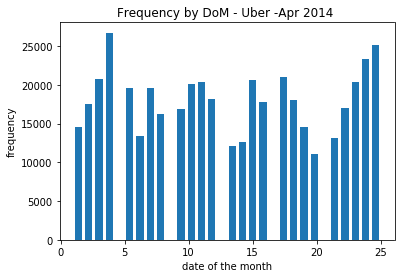

In [22]:
hist(data.dom, bins=30, rwidth=.7, range=(1,25))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber -Apr 2014 ')

In [23]:
for k, rows in data.groupby('dom'):
    print((k, rows))
    break

(1,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
5      2014-04-01 00:33:00  40.7383 -74.0403  B02512    1        1     0
6      2014-04-01 00:39:00  40.7223 -73.9887  B02512    1        1     0
7      2014-04-01 00:45:00  40.7620 -73.9790  B02512    1        1     0
8      2014-04-01 00:55:00  40.7524 -73.9960  B02512    1        1     0
9      2014-04-01 01:01:00  40.7575 -73.9846  B02512    1        1     1
10     2014-04-01 01:19:00  40.7256 -73.9869  B02512    1        1     1
11     2014-04-01 01:48:00  40.7591 -73.9684  B02512    1        1     1
12     2014-04-01 01:49:00  40.7271 -73.9803  B

In [24]:
for k, rows in data.groupby('dom'):
    print((k,len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [25]:
def count_rows(rows) : 
    return len(rows)
by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

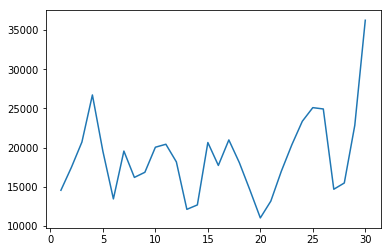

In [26]:
plot(by_date)

<Container object of 30 artists>

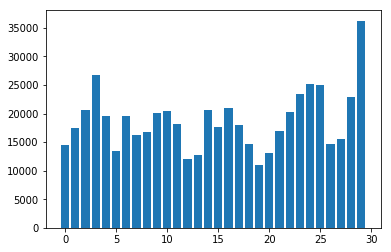

In [33]:
bar(range(0,30), by_date)

<Container object of 30 artists>

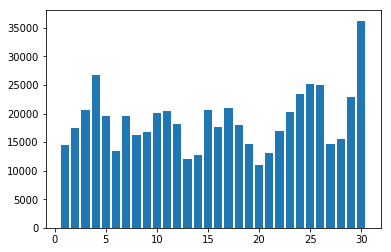

In [34]:
bar(range(1,31), by_date)

In [35]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5,1,'Frequency by DoM - Uber -Apr 2014 ')

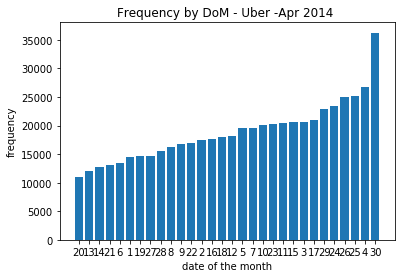

In [39]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber -Apr 2014 ')

## Analysis the hour

(array([  7769.,   4935.,   5040.,   6095.,   9476.,  18498.,  24924.,
         22843.,  17939.,  17865.,  18774.,  19425.,  22603.,  27190.,
         35324.,  42003.,  45475.,  43003.,  38923.,  36244.,  36964.,
         30645.,  20649.,      0.]),
 array([  0.5       ,   1.47916667,   2.45833333,   3.4375    ,
          4.41666667,   5.39583333,   6.375     ,   7.35416667,
          8.33333333,   9.3125    ,  10.29166667,  11.27083333,
         12.25      ,  13.22916667,  14.20833333,  15.1875    ,
         16.16666667,  17.14583333,  18.125     ,  19.10416667,
         20.08333333,  21.0625    ,  22.04166667,  23.02083333,  24.        ]),
 <a list of 24 Patch objects>)

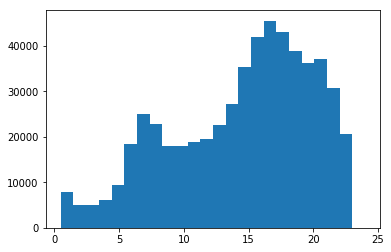

In [48]:
hist(data.hour, bins=24, range=(0.5,24))

([<matplotlib.axis.XTick at 0x21d93eb3a90>,
 <a list of 7 Text xticklabel objects>)

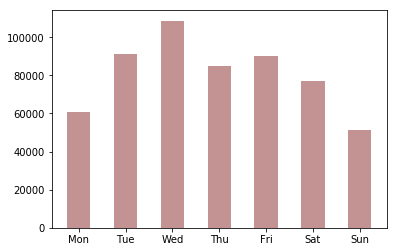

In [60]:
hist(data.weekday, bins=7, range=(-.5, 6.5), rwidth=0.5, color="#AA6666", alpha=.7)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

## Cross analysis (hour, DoM)

In [65]:
data.groupby('hour weekday'.split()).apply(count_rows)

hour  weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
      5          3027
      6          4542
1     0           261
      1           367
      2           507
      3           459
      4           760
      5          2479
      6          2936
2     0           238
      1           304
      2           371
      3           342
      4           513
      5          1577
      6          1590
3     0           571
      1           516
      2           585
      3           567
      4           736
      5          1013
      6          1052
4     0          1021
      1           887
                 ... 
19    5          5529
      6          2579
20    0          3573
      1          6310
      2          7783
      3          6345
      4          5165
      5          4792
      6          2276
21    0          3079
      1          5993
      2          6921
      3          6585
      4          6

In [67]:
by_h_d = data.groupby('hour weekday'.split()).apply(count_rows).unstack()
by_h_d

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


In [70]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

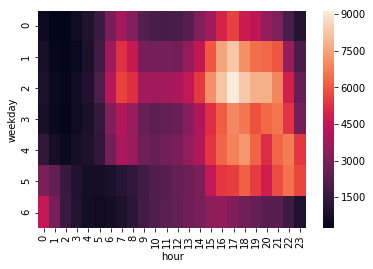

In [71]:
seaborn.heatmap(by_cross)

## by lat and Lon

(array([  4.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          1.00000000e+01,   7.00000000e+00,   1.20000000e+01,
          9.00000000e+00,   7.00000000e+00,   2.00000000e+01,
          1.05000000e+02,   7.90000000e+01,   1.02000000e+02,
          9.80000000e+01,   1.78000000e+02,   2.31000000e+02,
          1.72000000e+02,   3.23000000e+02,   3.54000000e+02,
          4.21000000e+02,   3.75000000e+02,   4.82000000e+02,
          5.24000000e+02,   5.25300000e+03,   7.09200000e+03,
          8.24000000e+02,   1.05900000e+03,   1.59500000e+03,
          2.28800000e+03,   3.93300000e+03,   5.36000000e+03,
          5.16700000e+03,   7.42900000e+03,   7.38600000e+03,
          4.74000000e+03,   7.43400000e+03,   1.39920000e+04,
          1.54070000e+04,   2.79080000e+04,   4.05000000e+04,
          3.40080000e+04,   3.19180000e+04,   3.32570000e+04,
        

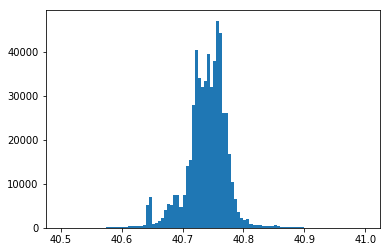

In [74]:
hist(data['Lat'], bins=100, range=(40.5, 41))

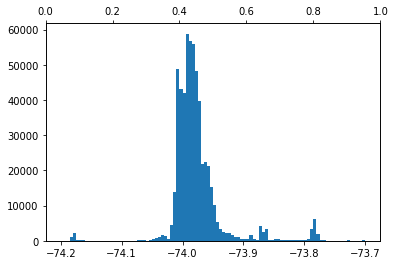

In [88]:
hist(data['Lon'], bins=100, range = (-74.2, -73.7))

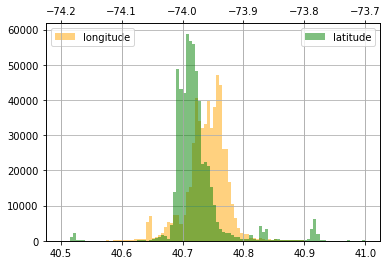

In [101]:
hist(data['Lat'], bins=100, range=(40.5, 41), color = "orange", alpha =.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()

hist(data['Lon'], bins=100, range = (-74.2, -73.7), color = "green", alpha =.5, label = 'latitude')
grid()
legend(loc='best')

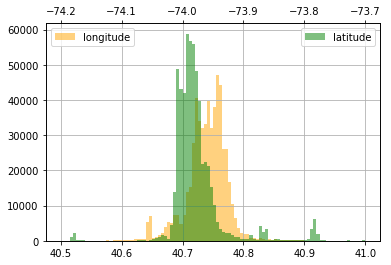

In [102]:
hist(data['Lat'], bins=100, range=(40.5, 41), color = "orange", alpha =.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lon'], bins=100, range = (-74.2, -73.7), color = "green", alpha =.5, label = 'latitude')
legend(loc='best')

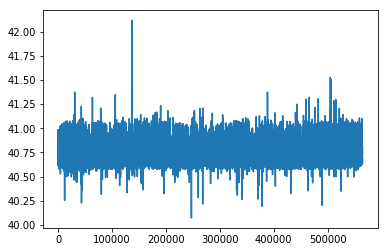

In [103]:
plot(data['Lat'])

(1, 100)

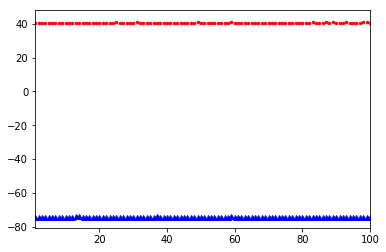

In [115]:
plot(data['Lat'], '.', ms=5, color="red", label = 'latitude')
plot(data['Lon'], '^', ms=5, color="blue", label = 'longitude')
xlim(1,100)

(40.5, 41.25)

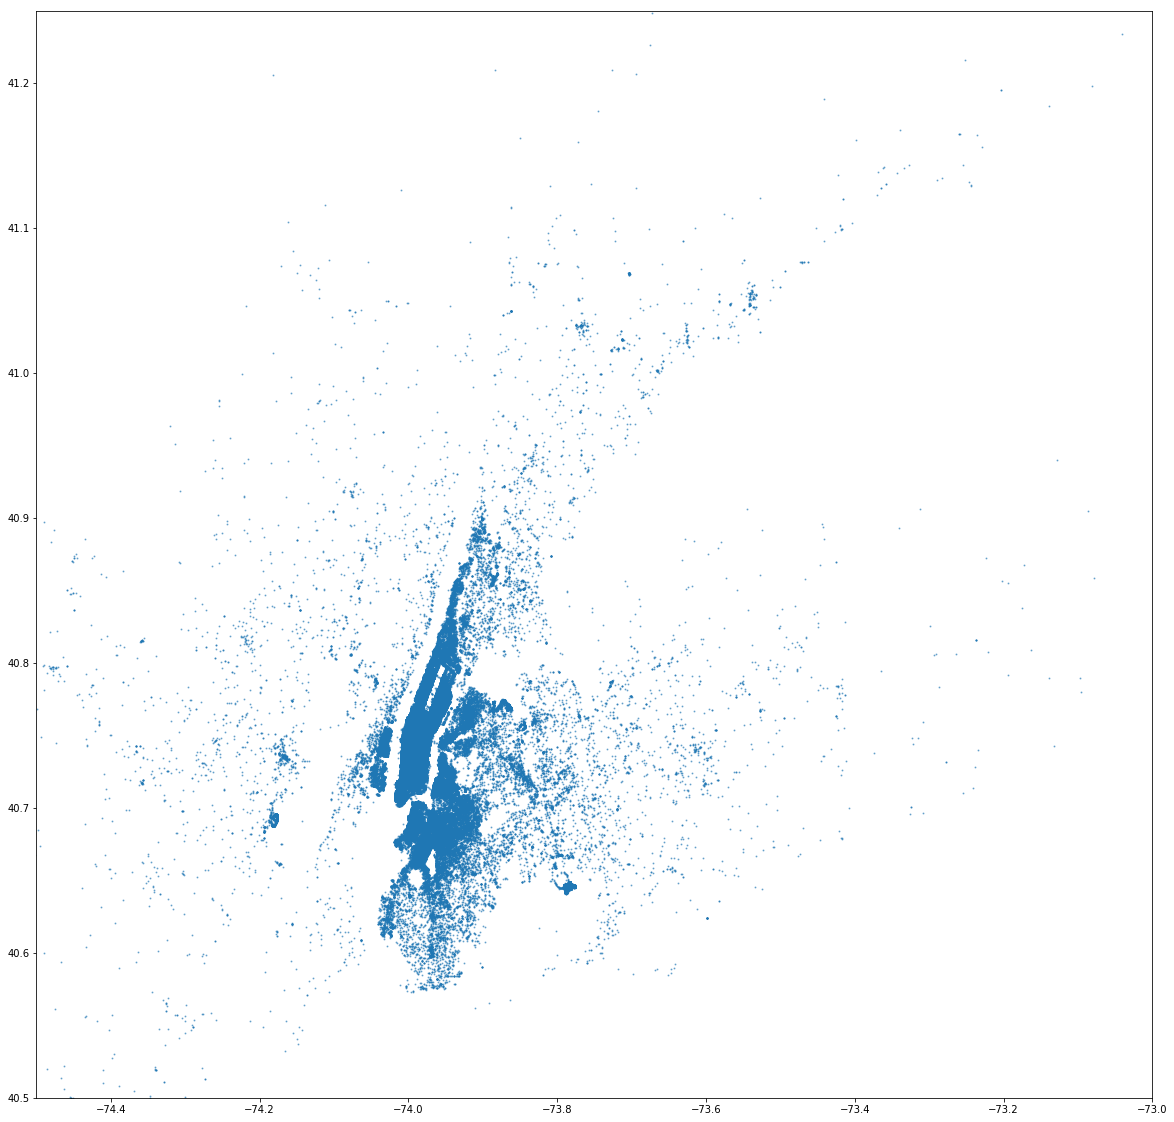

In [128]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], '.', ms=2, alpha=.5)
xlim(-74.5,-73)
ylim(40.50, 41.25)